# Final Exam (part 2) - Computational Physics I

### Deadline: Friday 13 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name: Vincent Noguera

## 2. Monte Carlo simulations: Cosmology (10 points) 

Supernovae type Ia (SN Ia) are very energetic astronomical explosions, which have a very similar intrinsic known brightness (i.e. they have a very similar absolute magnitude $M$), so they can be used as cosmological "standard candles" to measure the luminosity distance, $d$, as a function of redshift, $z$:

\begin{equation}
d=\frac{cz}{H_0}
\end{equation}

where $c$ is the speed of light and $H_0$ is the Hubble constant. Since they have similar absolute magnitudes $M$, we can estimate distances by comparing how bright or faint they appear on the sky as indicated by the measured apparent magnitude, $m$, which does differ:

\begin{equation}
m=M+5\log\left(\frac{d}{\rm Mpc}\right)+25
\end{equation}

Higher $m$ values imply objects are fainter; lower $m$ values imply objects are brighter. Same for $M$. Unfortunately, selection effects associated with instrumental limitations can bias our measurements. For example, far-away SN Ia can be so faint that they may not be detectable, so the sample will be biased towards brighter objects. In the equation above $\rm Mpc$ stands for Mega parsecs, which are distance units used in cosmology.

**Therefore, to understand selection bias, we want to simulate this effect using a Monte Carlo simulation.**

The purpose of this problem is to determine the bias as a function of redshift for a sample of objects (SN Ia) via a Monte Carlo calculation. To set up your simulation, assume that:

- $H_0 = 70\,\rm km\,s^{-1}\,Mpc^{-1}$

- the absolute magnitude of SN Ia $M=-19.5\,\rm mag$.

- your supernova search will be able to detect $100$% of objects as faint as $m=18.5\,\rm mag$, and none fainter. 



In [103]:
#import libraries:
import numpy as np
import matplotlib.pyplot as plt
import random

from astropy import units as u
from astropy.constants import c

### (a) Write a python function to generate $N$ Gaussian random variables with mean $\langle M\rangle=-19.5\,\rm mag$ and different standard deviations ($\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$).


$$g(x)=\frac{1}{\sigma \sqrt{2\pi}} exp \left(- \frac{1}{2}  \frac{(x-\mu)^{2}}{\sigma^2} \right)$$

https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html

In [104]:
def gen_Gaussian_rand(N, mean = -19.5, sigma=[0.1,0.2,0.5]):
    """
    Generate N Gaussian random variables with different standard deviations.
    
    Parameters:
    N (int): Number of random variables to generate.
    mean (float): Mean of the Gaussian distribution (default: -19.5).
    sigma (list): List of standard deviations for the Gaussian distribution 
                  (default: [0.1, 0.2, 0.5]).
    
    Returns:
    dict: A dictionary with the standard deviation as the key and the generated 
          Gaussian random variables as the values.
          The name of the keys will be 0.1, 0.2 and 0.5 for this case.
    """
    
    # Create a dictionary to store the results
    gaussian_tot = {}

    # Generate Gaussian random variables for each standard deviation in sigma
    for i in sigma:
        gaussian_tot[i] = np.random.normal(mean, i, N)
    
    return gaussian_tot

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [105]:
N=1500
gaussian_dict = gen_Gaussian_rand(N)

In [106]:
# print(gaussian_dict[0.1])

### (b) Make $3$ plots of $M$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M$.


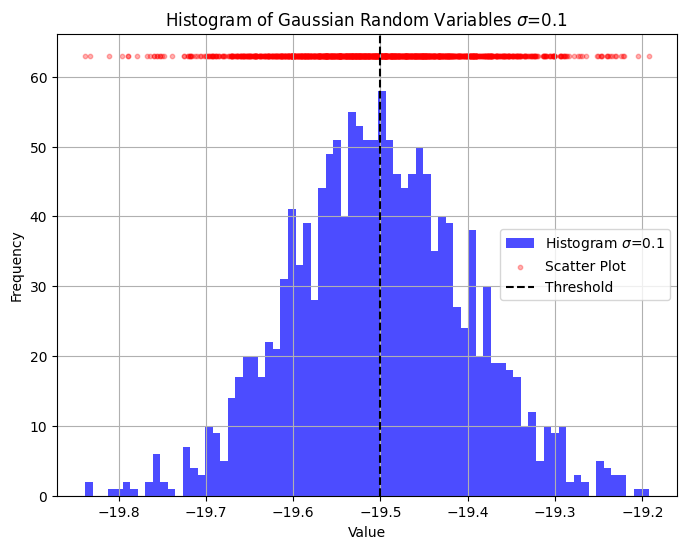

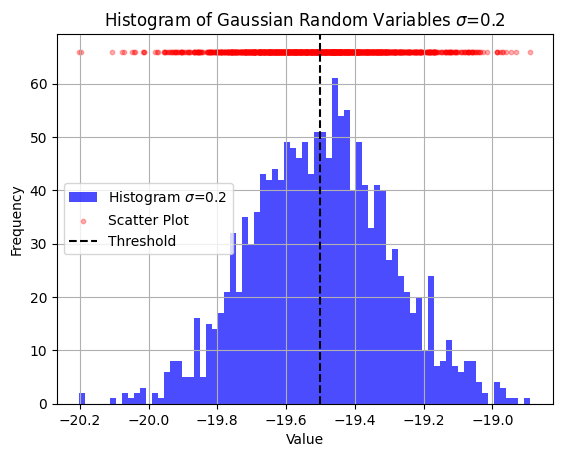

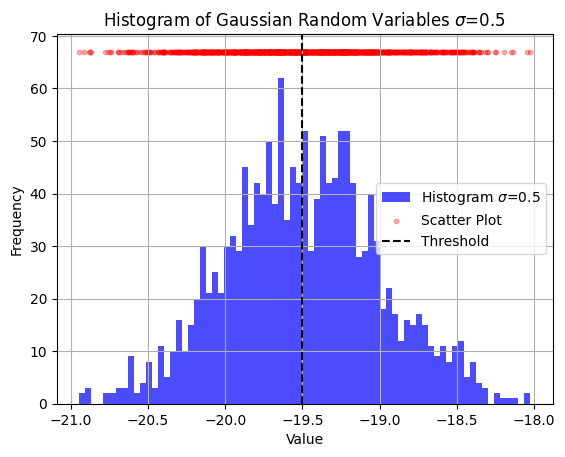

In [107]:
# Plot histogram of the generated values
plt.figure(figsize=(8, 6))
for sigma, values in gaussian_dict.items():
    bin_counts, _, _= plt.hist(values, bins=75 , color='blue', alpha=0.7, label=f'Histogram $\sigma$={sigma}')
    
    max_bin_index = np.argmax(bin_counts)
    
    max_bin_height = bin_counts[max_bin_index]
    
    vect = np.ones(N)*(max_bin_height+5)
    # Plot scatter (individual data points)
    plt.scatter(values, vect, color='red', alpha=0.3, label='Scatter Plot', s=10)

    plt.axvline(x=-19.5, color='black', linestyle='--', label='Threshold')
    plt.title(f'Histogram of Gaussian Random Variables $\sigma$={sigma}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.legend()
    # plt.xlim(-22,-15)
    plt.show()
    plt.tight_layout()
    
    plt.close()

### (c) Write a python function to calculate and return:

- the luminosity distances, $d$, in $\rm Mpc$ given redshifts between $z=0$ and $z=0.1$.

- the apparent magnitudes, $m$, for the same redshift range.


\begin{equation}
d=\frac{cz}{H_0}
\end{equation}

\begin{equation}
m=M+5\log\left(\frac{d}{\rm Mpc}\right)+25
\end{equation}

In [108]:
def calculate_lum_dis_and_m(z, M):
    # Constants:
    ##Transforming to m:
    H_0 = 70
    c = 3e5
    
    # Mpc to meter:
    # Mpc_m = 3.086e22
    Mpc_m = 1
    
    #Formulas to calculate:
    ##Luminosity distance
    d = (c*z)/(H_0)
    m_tot = []
    for num in d:
        ##aparent magnitudes
        
        m = M + 5*np.log10(num/Mpc_m) + 25
        m_tot.append(m)
        # print(m)
    return d, m_tot, m
#redshift range:
z = np.linspace(0, 0.1, N)
# print(z)
dist_01, m_tot_01, m_01 = calculate_lum_dis_and_m(z, gaussian_dict[0.1])
dist_02, m_tot_02, m_02 = calculate_lum_dis_and_m(z, gaussian_dict[0.2])
dist_05, m_tot_05, m_05 = calculate_lum_dis_and_m(z, gaussian_dict[0.5])
# print(m_tot_01)
# print(dist_01)

/tmp/ipykernel_329920/2269734095.py:18: RuntimeWarning: divide by zero encountered in log10
  m = M + 5*np.log10(num/Mpc_m) + 25


### (d) Write a python function that:

- reads the resulting $m$ values from item (c),

- removes values with apparent magnitudes larger than the detection threshold $m=18.5\,\rm mag$, 

- re-calculates the mean observed magnitude $\langle M_{\rm observed}\rangle$ of the SN Ia from the actually detected objects for the same redshift range.

- returns the bias as a function of redshift. The bias in $M$ can be calculated with:

\begin{equation}
|\Delta M|=|\langle M_{\rm observed}\rangle  - \langle M\rangle|
\end{equation}


In [109]:
def threshold(m_values, dist, mean_prev):
    threshold = 18.5
    bias_r_s_list = []
    clean_array_list = []
    non_detected_list = [ ]
    for it_m_values, dist_z in zip( m_values, dist):
        # mean_val_clean = np.where(it_m_values< -1e10, 0, it_m_values)
        # # print(mean_val_clean)
        # mean_val = np.mean(mean_val_clean)
        # print(mean_val)
        
        
        clean_array = it_m_values < threshold
        non_detected = ~ clean_array 
        # print(non_detected)
        clean_array = clean_array * it_m_values 
        
        
        non_detected = non_detected * it_m_values
        clean_array = np.where(clean_array<-1e10, 0, clean_array)
        # print(non_detected)
        ##Recalculated:
        M_obs = clean_array - 5*np.log10(dist_z) - 25
        # m = num + 5*np.log10(d/Mpc_m) + 25
        
        # print(clean_array)
        # non_detected = it_m_values > threshold
        
        mean_M_obs = np.mean(M_obs)
        # print(recalculated_mean)
        # print(recalculated_mean)
        # print(mean_val)
        bias_func_r_s =np.abs(mean_M_obs - mean_prev)
        # print(bias_func_r_s)
        
        clean_array_list.append(clean_array)
        
        bias_r_s_list.append(bias_func_r_s)
        non_detected_list.append(non_detected)
    return bias_r_s_list, clean_array_list, non_detected_list
    

In [110]:
bias_r_s_01, test_tresh_m_01, non_detect_01 = threshold(m_tot_01,dist_01, mean_prev=-19.5)
bias_r_s_02, test_tresh_m_02, non_detect_02 = threshold(m_tot_02,dist_01, mean_prev=-19.5)
bias_r_s_05, test_tresh_m_05, non_detect_05 = threshold(m_tot_05,dist_01, mean_prev=-19.5)
tresh_list = [test_tresh_m_01, test_tresh_m_02, test_tresh_m_05]
# print(test_tresh_m_01[0])
# print(len(non_detect_01[0]))
# print(non_detect_01[0])
# print(non_detect_01[0]*m_tot_01[5])
# print(bias_r_s_01)
# print(non_detect_01[0]*m_tot_01[4])

/tmp/ipykernel_329920/1898257692.py:19: RuntimeWarning: invalid value encountered in multiply
  non_detected = non_detected * it_m_values
/tmp/ipykernel_329920/1898257692.py:23: RuntimeWarning: divide by zero encountered in log10
  M_obs = clean_array - 5*np.log10(dist_z) - 25


### (e) Make $3$ plots of $m$ versus $N$, where $N$ is the number of generated objects, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$, showing the detection threshold and colouring distinctly the objects that would not be detected.


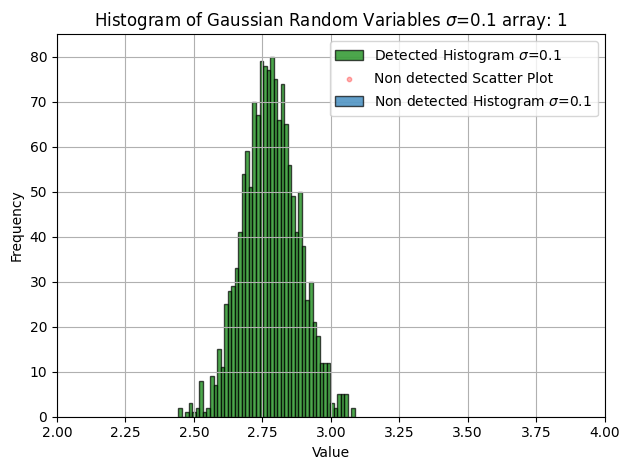

In [111]:
# plt.subplot(1, 3, i+1)  # Create a subplot in a 1x3 grid (i+1 is the subplot index)
    
# Plot histogram
bin_counts, bin_edges, _ = plt.hist(test_tresh_m_01[1], bins=50, color=colors[i], edgecolor='black', alpha=0.7, label=f'Detected Histogram $\sigma$=0.1')

# Find the index of the bin with the maximum count
max_bin_index = np.argmax(bin_counts)
max_bin_height = bin_counts[max_bin_index]

# Plot horizontal line at max bin height
vect = np.ones(N) *(max_bin_height )

# Plot scatter (individual data points)
plt.scatter(non_detect_01[1], vect, color='red', alpha=0.3, label='Non detected Scatter Plot', s=10)
plt.hist(non_detect_01[1], bins=50, edgecolor='black', alpha=0.7, label=f'Non detected Histogram $\sigma$=0.1')


# Set the title, labels, and grid
plt.title(f'Histogram of Gaussian Random Variables $\sigma$=0.1 array: 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
# plt.axvline(x=18.5, color='black', linestyle='--', label='Threshold')
plt.legend()
    
    # Set the x-axis limits to range from 5 to 23
plt.xlim(2, 4)
    # y_lim = test_tresh_m_01[-1]*1 +2
plt.ylim(0, max_bin_height+5)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
# plt.legend()
plt.show()

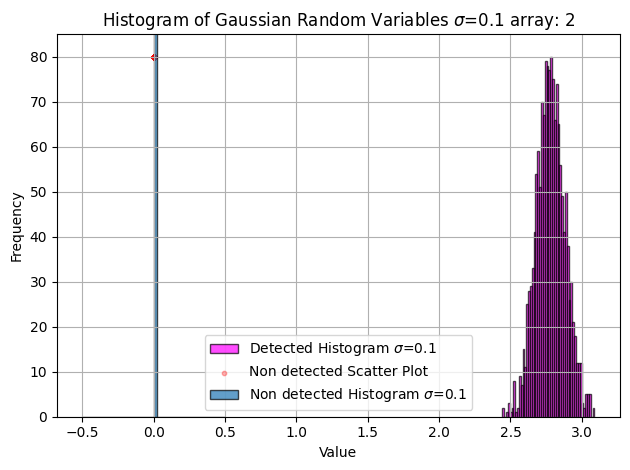

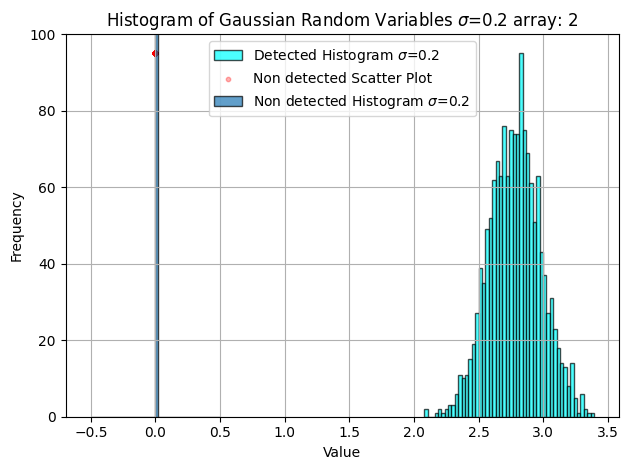

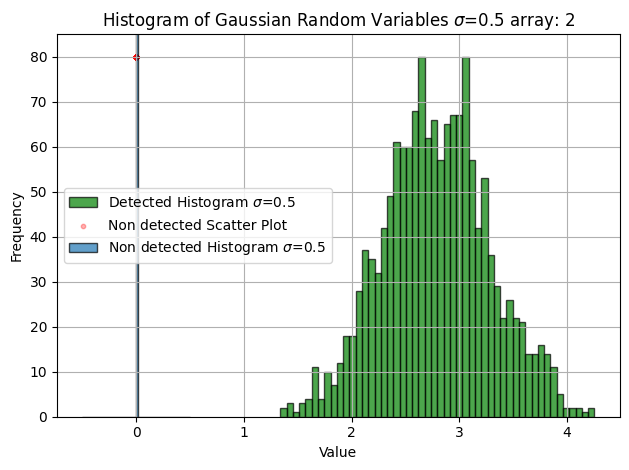

In [112]:
num=[test_tresh_m_01,test_tresh_m_02,test_tresh_m_05]
non_det = [non_detect_01, non_detect_02, non_detect_05]
sigma=["0.1","0.2","0.5"]

colors = ["magenta", "aqua", "green"]
for i in range(3):
    # Plot histogram
    # print( i)
    bin_counts, bin_edges, _ = plt.hist(num[i][1], bins=50, color=colors[i], edgecolor='black', alpha=0.7, label=f'Detected Histogram $\sigma$={sigma[i]}')
    
    # Find the index of the bin with the maximum count
    max_bin_index = np.argmax(bin_counts)
    max_bin_height = bin_counts[max_bin_index]
    
    # Plot horizontal line at max bin height
    vect = np.ones(N) *(max_bin_height )
    
    # Plot scatter (individual data points)
    plt.scatter(non_det[i][1], vect, color='red', alpha=0.3, label='Non detected Scatter Plot', s=10)
    plt.hist(non_det[i][1], bins=50, edgecolor='black', alpha=0.7, label=f'Non detected Histogram $\sigma$={sigma[i]}')
    
    
    # Set the title, labels, and grid
    plt.title(f'Histogram of Gaussian Random Variables $\sigma$={sigma[i]} array: 2')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    # plt.axvline(x=18.5, color='black', linestyle='--', label='Threshold')
    plt.legend()
        
        # Set the x-axis limits to range from 5 to 23
    # plt.xlim(2, 4)
        # y_lim = test_tresh_m_01[-1]*1 +2
    plt.ylim(0, max_bin_height+5)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    
    # Show the plot
    # plt.legend()
    plt.show()

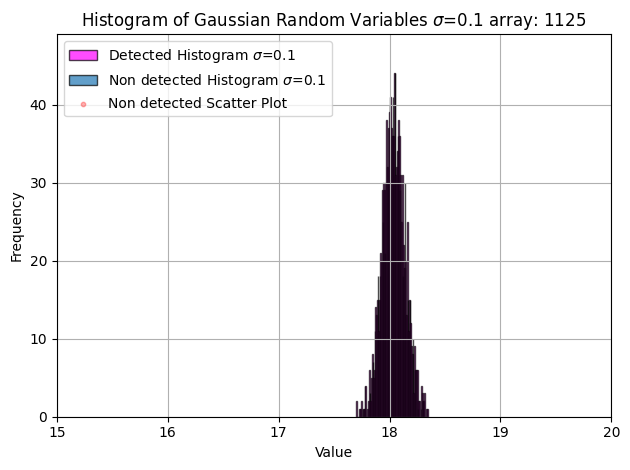

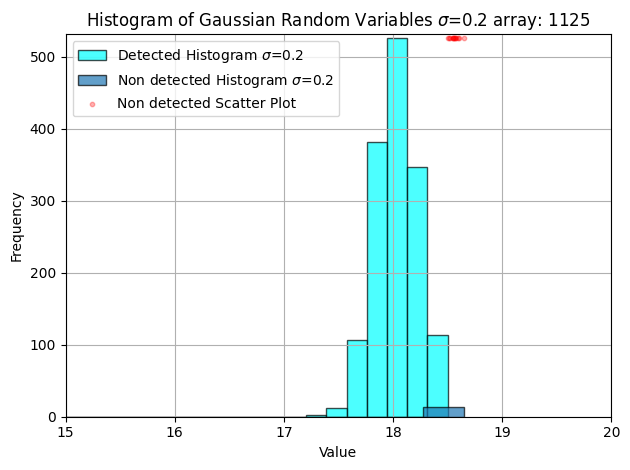

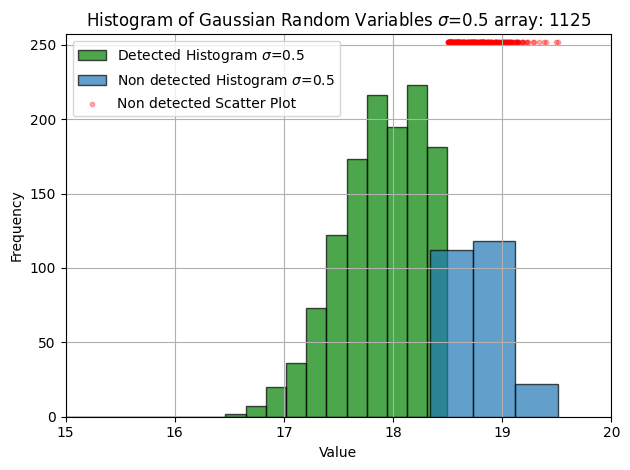

In [113]:
num=[test_tresh_m_01,test_tresh_m_02,test_tresh_m_05]
sigma=["0.1","0.2","0.5"]

colors = ["magenta", "aqua", "green"]
for i in range(3):
    # Plot histogram
    # print( i)
    bin_counts, bin_edges, _ = plt.hist(num[i][(N*3)//4], bins=100, color=colors[i], edgecolor='black', alpha=0.7, label=f'Detected Histogram $\sigma$={sigma[i]}')
    plt.hist(non_det[i][(N*3)//4], bins=50, edgecolor='black', alpha=0.7, label=f'Non detected Histogram $\sigma$={sigma[i]}')
    
    # Find the index of the bin with the maximum count
    max_bin_index = np.argmax(bin_counts)
    max_bin_height = bin_counts[max_bin_index]
    
    # Plot horizontal line at max bin height
    vect = np.ones(N) *(max_bin_height )
    
    # Plot scatter (individual data points)
    plt.scatter(non_det[i][(N*3)//4], vect, color='red', alpha=0.3, label='Non detected Scatter Plot', s=10)
    
    
    # Set the title, labels, and grid
    plt.title(f'Histogram of Gaussian Random Variables $\sigma$={sigma[i]} array: {(N*3)//4}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    # plt.axvline(x=18.5, color='black', linestyle='--', label='Threshold')
    plt.legend()
        
        # Set the x-axis limits to range from 5 to 23
    plt.xlim(15, 20)
        # y_lim = test_tresh_m_01[-1]*1 +2
    plt.ylim(0, max_bin_height+5)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    
    # Show the plot
    # plt.legend()
    plt.show()

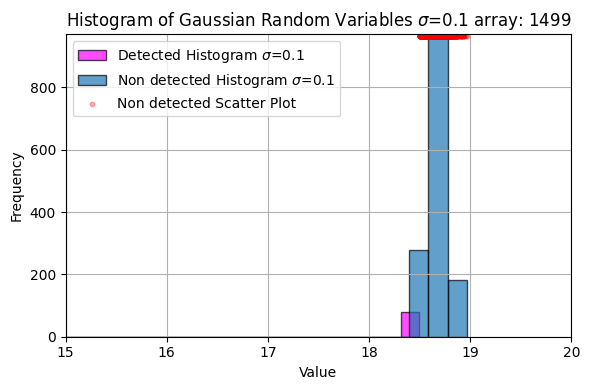

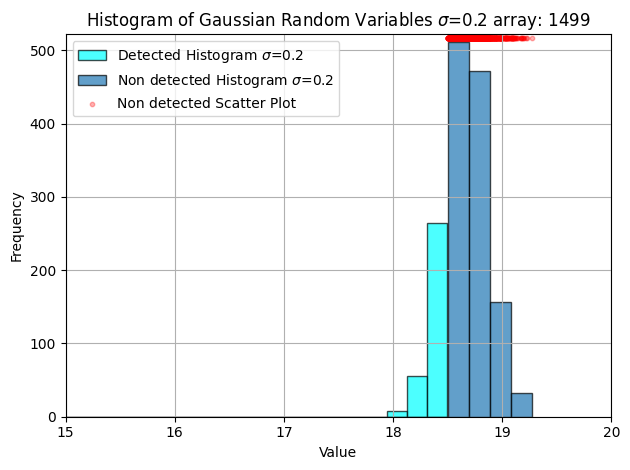

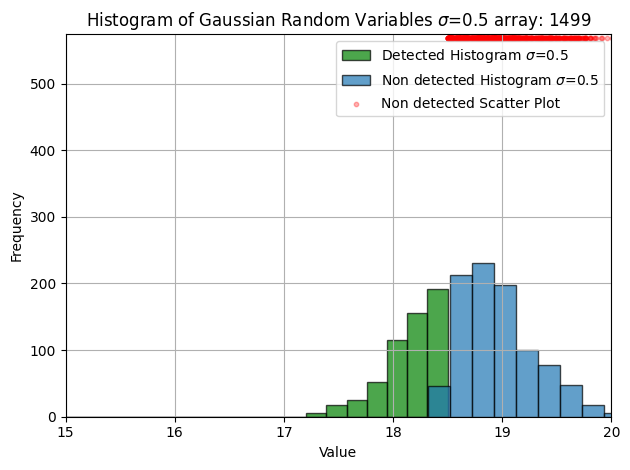

In [114]:
num=[test_tresh_m_01,test_tresh_m_02,test_tresh_m_05]
sigma=["0.1","0.2","0.5"]

colors = ["magenta", "aqua", "green"]
plt.figure(figsize=(6,4))
for i in range(3):
    # Plot histogram
    # print( i)
    bin_counts, bin_edges, _ = plt.hist(num[i][N-1], bins=100, color=colors[i], edgecolor='black', alpha=0.7, label=f'Detected Histogram $\sigma$={sigma[i]}')
    bin_counts_non, bin_edges_non, _ = plt.hist(non_det[i][N-1], bins=100, edgecolor='black', alpha=0.7, label=f'Non detected Histogram $\sigma$={sigma[i]}')
    
    # Find the index of the bin with the maximum count
    max_bin_index = np.max(bin_counts_non)
    # max_bin_height = bin_counts[max_bin_index]
    
    # Plot horizontal line at max bin height
    vect = np.ones(N) *(max_bin_index +5)
    
    # Plot scatter (individual data points)
    plt.scatter(non_det[i][N-1], vect, color='red', alpha=0.3, label='Non detected Scatter Plot', s=10)
    
    
    # Set the title, labels, and grid
    plt.title(f'Histogram of Gaussian Random Variables $\sigma$={sigma[i]} array: {N-1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    # plt.axvline(x=18.5, color='black', linestyle='--', label='Threshold')
    plt.legend()
        
        # Set the x-axis limits to range from 5 to 23
    plt.xlim(15, 20)
        # y_lim = test_tresh_m_01[-1]*1 +2
    plt.ylim(0, max_bin_index+10)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    
    # Show the plot
    # plt.legend()
    plt.show()

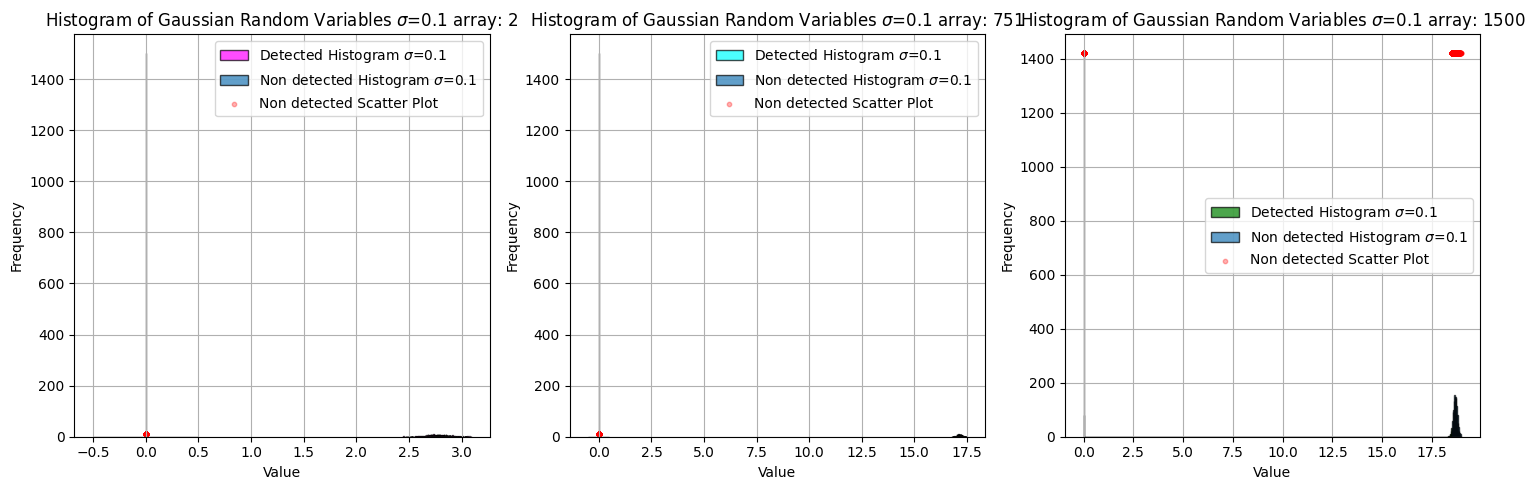

In [115]:
pos = [1,N//2,N-1]
plt.figure(figsize=(15, 5))
# sigma = 0.1
colors = ["magenta", "aqua", "green"]
for i in range(3):
    plt.subplot(1, 3, i+1)  # Create a subplot in a 1x3 grid (i+1 is the subplot index)
    
    # Plot histogram
    bin_counts, bin_edges, _ = plt.hist(test_tresh_m_01[pos[i]], bins=750, color=colors[i], edgecolor='black', alpha=0.7, label=f'Detected Histogram $\sigma$=0.1')
    bin_counts_non_d, bin_edges_non_d, _= plt.hist(non_detect_01[pos[i]], bins=750, edgecolor='black', alpha=0.7, label=f'Non detected Histogram $\sigma$=0.1')
    
    # Find the index of the bin with the maximum count
    max_bin_index = np.argmax(bin_counts)
    max_bin_height = bin_counts[max_bin_index]
    
    # Plot horizontal line at max bin height
    vect = np.ones(N) *(max_bin_height )
    
    # Plot scatter (individual data points)
    plt.scatter(non_detect_01[pos[i]], vect, color='red', alpha=0.3, label='Non detected Scatter Plot', s=10)
    # plt.hist(non_detect_01[pos[i]], bins=750, edgecolor='black', alpha=0.7, label=f'Non detected Histogram $\sigma$=0.1')
    
    
    # Set the title, labels, and grid
    plt.title(f'Histogram of Gaussian Random Variables $\sigma$=0.1 array: {pos[i]+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    # plt.axvline(x=18.5, color='black', linestyle='--', label='Threshold')
    plt.legend()
    
    # Set the x-axis limits to range from 5 to 23
    # plt.xlim(0, 23)
    # y_lim = test_tresh_m_01[-1]*1 +2
    # plt.ylim(0, 200)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
# plt.legend()
plt.show()

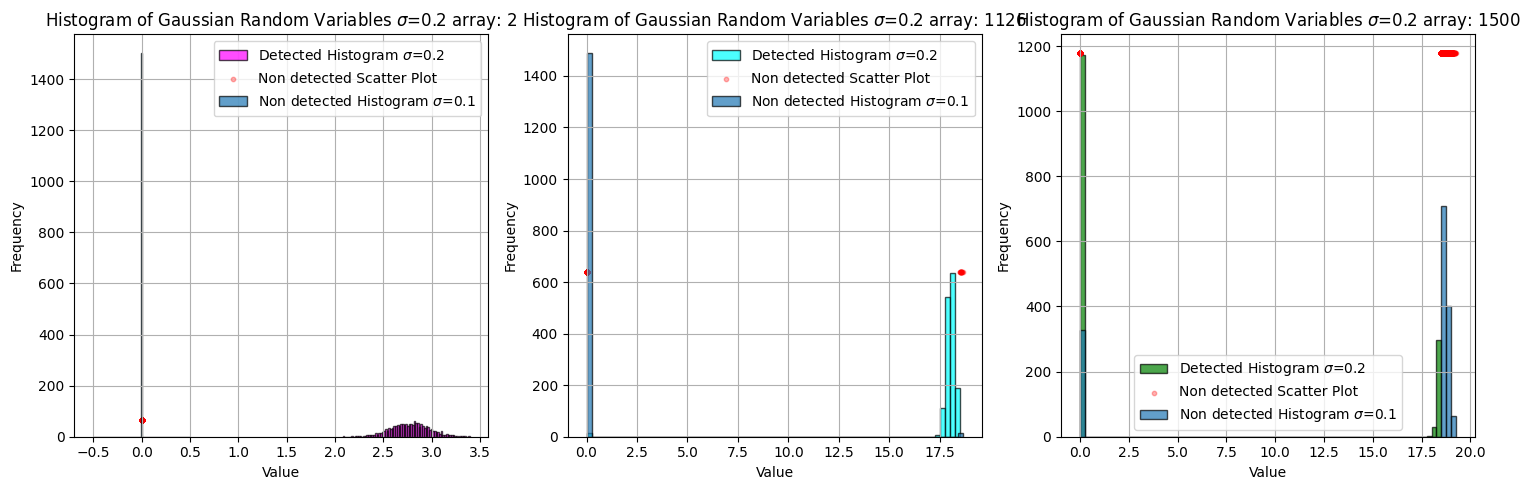

In [116]:
pos = [1,N*3//4,N-1]
plt.figure(figsize=(15, 5))
colors = ["magenta", "aqua", "green"]
for i in range(3):
    plt.subplot(1, 3, i+1)  # Create a subplot in a 1x3 grid (i+1 is the subplot index)
    
    # Plot histogram
    bin_counts, bin_edges, _ = plt.hist(test_tresh_m_02[pos[i]], bins=75, color=colors[i], edgecolor='black', alpha=0.7, label=f'Detected Histogram $\sigma$=0.2')
    
    # Find the index of the bin with the maximum count
    max_bin_index = np.argmax(bin_counts)
    max_bin_height = bin_counts[max_bin_index]
    
    # Plot horizontal line at max bin height
    vect = np.ones(N) * (max_bin_height + 5)
    
    # Plot scatter (individual data points)
    plt.scatter(non_detect_02[pos[i]], vect, color='red', alpha=0.3, label='Non detected Scatter Plot', s=10)
    plt.hist(non_detect_02[pos[i]], bins=75, edgecolor='black', alpha=0.7, label=f'Non detected Histogram $\sigma$=0.1')
    
    
    # Set the title, labels, and grid
    plt.title(f'Histogram of Gaussian Random Variables $\sigma$=0.2 array: {pos[i]+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.legend()
    
    # Set the x-axis limits to range from 5 to 23
    # plt.xlim(5, 23)
    # plt.ylim(0,100)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
# plt.legend()
plt.show()

### (f) Make $3$ plots of $|\Delta M|$ versus $z$, one for each $\sigma_M=0.1$, $0.2$, and $0.5\,\rm mag$.


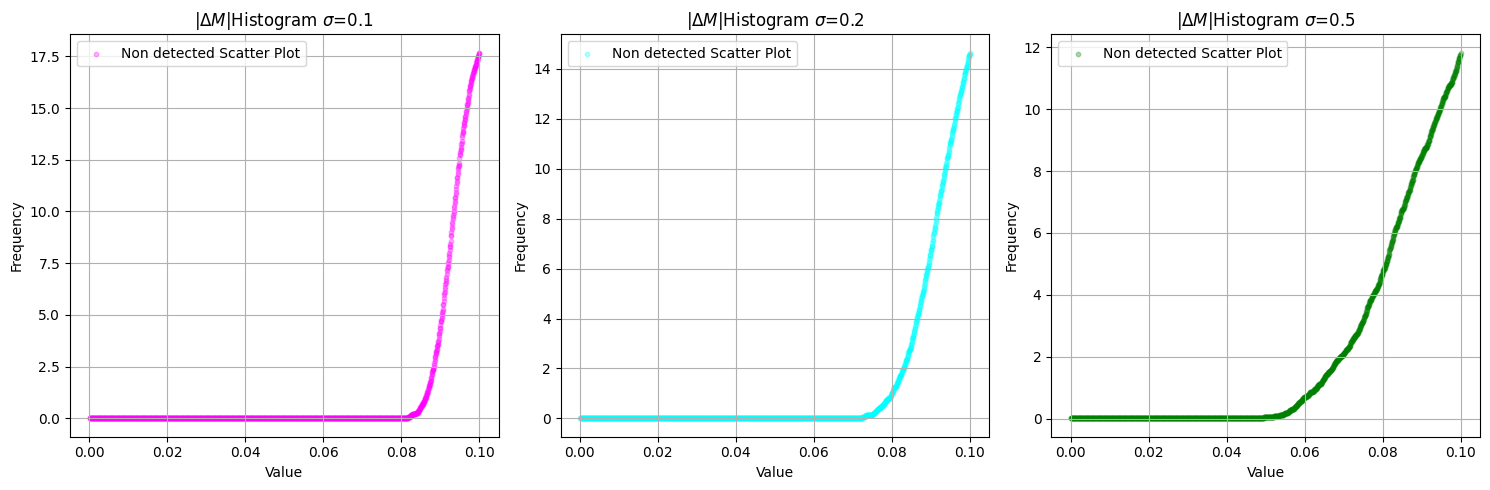

In [117]:
pos = [0,N//2,N-1]
plt.figure(figsize=(15, 5))
# sigma = 0.1
colors = ["magenta", "aqua", "green"]
num=[bias_r_s_01,bias_r_s_02,bias_r_s_05]
sigma=["0.1","0.2","0.5"]
# bias_r_s_01
# print(f"bias_r_s_{num[i]}")

for i in range(3):
    plt.subplot(1, 3, i+1) 
    plt.scatter(z, num[i], color=f"{colors[i]}", alpha=0.3, label='Non detected Scatter Plot', s=10)

    # Find the index of the bin with the maximum count
    max_bin_index = np.argmax(bin_counts)
    max_bin_height = bin_counts[max_bin_index]
    
    # Plot horizontal line at max bin height
    vect = np.ones(N) * (max_bin_height + 5)
    
    
    # Set the title, labels, and grid
    plt.title(f'$|\Delta M|$Histogram $\sigma$={sigma[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    # plt.axvline(x=18.5, color='black', linestyle='--', label='Threshold')
    plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
# plt.legend()
plt.show()

ValueError: supplied range of [0.0016743285173710376, inf] is not finite

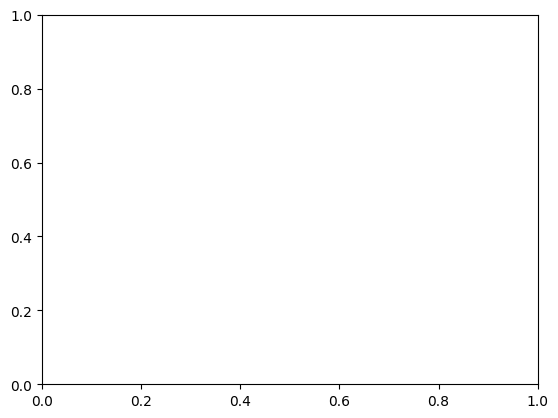

In [118]:

# for i in range(3):
    # plt.subplot(1, 3, i+1)  # Create a subplot in a 1x3 grid (i+1 is the subplot index)
    
# Plot histogram
bin_counts, bin_edges, _ = plt.hist(bias_r_s_02, bins=50, color="red", edgecolor='black' , alpha=0.7, label=f'$|\Delta M|$Histogram $\sigma$=0.2')


# Set the title, labels, and grid
plt.title(f'Histogram of Gaussian Random Variables $\sigma$=0.2 ')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
# plt.axvline(x=18.5, color='black', linestyle='--', label='Threshold')
plt.legend()

# Set the x-axis limits to range from 5 to 23
# plt.xlim(5, 23)
# plt.ylim(0,100)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
# plt.legend()
plt.show()

In [ ]:
print(bias_r_s_02)
# for i in range(3):
    # plt.subplot(1, 3, i+1)  # Create a subplot in a 1x3 grid (i+1 is the subplot index)
    
# Plot histogram
bin_counts, bin_edges, _ = plt.hist(bias_r_s_02, bins=50, color="aqua", edgecolor='black' , alpha=0.7, label=f'$|\Delta M|$Histogram $\sigma$=0.5')


# Set the title, labels, and grid
plt.title(f'Histogram of Gaussian Random Variables $\sigma$=0.5')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
# plt.axvline(x=18.5, color='black', linestyle='--', label='Threshold')
plt.legend()

# Set the x-axis limits to range from 5 to 23
# plt.xlim(5, 23)
# plt.ylim(0,100)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
# plt.legend()
plt.show()

### (g) Based on your results, at which redshift does selection bias become important in each case?